# Self Study 7: Solow and the Steady State

## Section 1: The Solow Model

$$
Y = A \cdot K^\alpha \cdot L^{1-\alpha} 
$$

$$
\frac{dK}{dt} = s \cdot Y - \delta \cdot K
$$

$$
\frac{dL}{dt} = n \cdot L
$$

### Task 1: Explain the meaning of each variable in the equations above.

Note that the variable names may be different from the slides

- $ K $ The aggregate level of capital in the economy.
- $ L $ The aggregate level of labor in the economy.
- $ Y $ The aggregate level of output in the economy.
- $ s $ The proportion of output that is saved rather than consumed.
- $ \delta $ The rate at which capital decays or depreciates over time.
- $ n $ The rate at which the labor force grows.
- $ A $ The level of technology in the economy.
- $ \alpha $ Is the marginal product of capital.
- $ (1 - \alpha) $ Is the marginal product of labor, for the general case (not constant returns to scale) this would be $\beta$.

### Task 2: Write down the intensive form of the model.

The above equations are in extensive form, which means they are in terms of total output, capital, labour. To simplify the analysis and reasoning about the implications of the model, we can convert the equations to intensive form, which means they are in terms of output *per worker*, capital per worker, and labour per worker.

It is common to use lower case letters to denote intensive variables, and upper case letters to denote extensive variables. For example, $k$ is capital per worker, and $K$ is total capital.

Write down the intensive form of the model:

$$
\begin{align*}
k &= \frac{K}{L}\\
l &= \frac{L}{L} = 1 \\
y &= A k^\alpha l^{1-\alpha} = A k^\alpha
\end{align*}
$$

$$
\frac{dk}{dt} = s \cdot y - (\delta + n) \cdot k
$$

$$
\frac{dl}{dt} = \frac{d 1}{dt} = 0
$$

### Task 3: Plot both the extensive and intensive form of the model.

With the approach presented in earlier self-studies (e.g., using `odeint`) plot Capital and Ouput per worker over time.




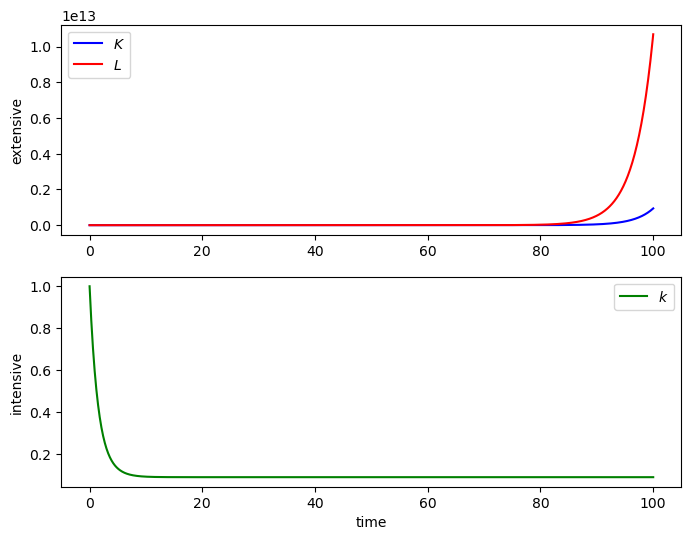

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def extensive_system(KL, t, alpha, delta, s, n):
    K, L = KL
    Y = K**alpha * L**(1-alpha)
    dKdt = s * Y - (delta + n) * K
    dLdt = n * L
    return [dKdt, dLdt]

def plot_intensive_and_extensive():
    t = np.linspace(0, 100, 1000)
    alpha = 0.2
    delta = 0.1
    s = 0.1
    n = 0.3
    k0 = 1
    L0 = 1
    K0 = k0 * L0
    
    KL = odeint(extensive_system, [K0, L0], t, args=(alpha, delta, s, n))
    # plot the extensive variables
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, KL[:, 0], 'b-', label='$K$')
    plt.plot(t, KL[:, 1], 'r-', label='$L$')
    plt.legend(loc='best')
    # plt.xlabel('time')
    plt.ylabel('extensive')

    # plot the intensive variables
    k = KL[:, 0] / KL[:, 1]   # here we use the fact that k = K/L (which we have already computed)
    plt.subplot(2, 1, 2)
    plt.plot(t, k, 'g-', label='$k$')
    plt.xlabel('time')
    plt.ylabel('intensive')
    plt.legend(loc='best')
    plt.show()
    
plot_intensive_and_extensive()
    

## Section 2: The Steady State and Golden Rule


### Task 1: Find steady state capital and consumption per worker.

The steady state is the long-run equilibrium, where capital per worker and output per worker are constant. In other words, the steady state is the point where the change in capital per worker and output per worker are zero. Find the steady state level of capital $k^*$, i.e., where $\frac{dk}{dt} = 0$.

In [6]:
from sympy import symbols, Eq, solve
# Define all the symbols

A, k, alpha, s, y, delta, n = symbols('A k alpha s y delta n')

eq = Eq(s * A * k ** alpha, (delta + n) * k)
k_star = solve(eq, k)[0]
k_star


(A*s/(delta + n))**(-1/(alpha - 1))

Wit the steady state level of capital, we can find the steady state level of output and consumption per worker. Recall that $y = A \cdot k^\alpha$ and $c = (1-s) \cdot y$.

$$
c= (1-s)\cdot A\cdot (k^\ast)^\alpha
$$
$$
c=(1-s)\cdot A\cdot \left(\frac{As}{\delta+n}\right)^{\frac{\alpha}{1-\alpha}}
$$

### Task 2: The Golden Rule level of savings.

**Question:** What is the Golden Rule level of savings?\
**Answer:**


**Question:** If it the real savings rate is higher than the Golden Rule level, what happens to consumption per worker?
**Answer:**


Derive the Golden Rule level of savings, $s_\text{gold}$.

Steps:
1. Write down the equation for consumption per worker, $c$ at the steady state $k = k^*$.
2. Take the derivative of $c$ with respect to $s$, i.e. find the critical point.
3. Set the derivative equal to zero and solve for $s$.


In [7]:
from sympy import diff

c_star = (1 - s) * A * k_star ** alpha
dcds = diff(c_star, s)

solve(dcds, s)[0]

alpha

## Section 3: Adding Human Capital

Human capital refers to the skills, knowledge, experience, and abilities possessed by workers. In the context of economic growth, human capital is essential because it enhances the productivity of labor.\
Traditional physical capital $K$ like machinery and buildings is not the sole driver of economic output; the skill level and efficiency of the workforce are equally important.

In this section we look at how to operationalize human capital in the Solow model.


### Operationalization with Human Capital

The production function incorporating human capital is:

$$
Y = A \cdot K^\alpha \cdot H^\beta \cdot L^{1-\alpha-\beta}
$$

The equations for capital and labor accumulation are:
$$
\frac{dK}{dt} = s_k \cdot Y - \delta_k \cdot K
$$
$$
\frac{dH}{dt} = s_h \cdot Y - \delta_h \cdot H
$$
$$
\frac{dL}{dt} = n \cdot L
$$

### Task 1: Explain the meaning of each variable in the equations above.

- $ K $ The aggregate level of physical capital in the economy.
- $ H $ The aggregate level of human capital in the economy.
- $ L $ The aggregate level of labor in the economy.
- $ Y $ The aggregate level of output in the economy.
- $ s_k $ The proportion of output that is saved rather than consumed and invested in physical capital.
- $ s_h $ The proportion of output that is saved rather than consumed and invested in human capital.
- $ \delta_k $ The rate at which physical capital decays or depreciates over time.
- $ \delta_h $ The rate at which human capital decays or depreciates over time.
- $ n $ The rate at which the labor force grows.
- $ A $ The level of technology in the economy.
- $ \alpha $ Is the marginal product of physical capital.
- $ \beta $ Is the marginal product of human capital.
- $ (1 - \alpha - \beta) $ Is the marginal product of labor.


### Task 2: Write down the intensive form of the model.

To transition to the intensive form, we'll redefine these variables per effective worker ($ A \cdot L $); dropping the $ A \cdot L $ terms from the equations.

- Capital per effective worker: $ k = \frac{K}{A \cdot L} $
- Human capital per effective worker: $ h = \frac{H}{A \cdot L} $
- Output per effective worker: $ y = \frac{Y}{A \cdot L} $

The intensive form of the model becomes:

$$
y = k^\alpha \cdot h^\beta
$$
$$
\frac{dk}{dt} = s_k \cdot y - (n + \delta_k) \cdot k = s_k \cdot k^\alpha \cdot h^\beta - (n + \delta_k) \cdot k
$$
$$
\frac{dh}{dt} = s_h \cdot y - (n + \delta_h) \cdot h = s_h \cdot k^\alpha \cdot h^\beta - (n + \delta_h) \cdot h
$$

Here, $ s_k $ and $ s_h $ are the proportions of output invested in physical and human capital, respectively.

### Insights: Small (Formal) Changes -> Big (Analytical) Challenges

In case you are wondering, the $ k^\text{stat} $ is:

$$
k^\text{stat} =  \exp \left\{\frac{\beta  \log (\delta_h+n)+\log (\delta_k+n)-\beta  \log (s_h (\delta_k+n))+(\beta -1) \log (s_k)}{\alpha +\beta -1}\right\}
$$

Don't be concerned with the derivation, `sympy` can't handle it. I used Mathematica.

My intention in mentioning this is to illustrate how minor modifications to a model with an elegant analytical solution can result in a model that lacks one or may not even possess an analytical solution at all.
The drawback of such "complex" solutions is the loss of interpretability. However, we can still use the model to simulate dynamics and learn about comparative statics. The solution for $h^\text{stat}$ is similar.
 
 Assuming $s_k = s_h = s$ and $\delta_k = \delta_h = \delta$:

$$
k^\text{stat} = \left(\frac{s}{\delta +n}\right)^{\frac{1}{1-\alpha -\beta}}
$$

But we gave up all the interesting aspects of the process.

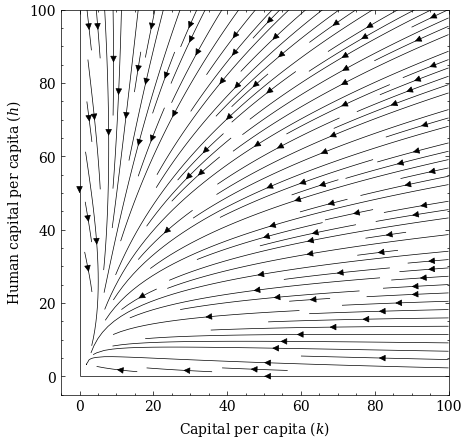

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.2  # marginal product of capital
beta = 0.4   # marginal product of human capital
s_k = 0.2    # Savings rate of physical capital
s_h = 0.2    # Savings rate of human capital
delta_k = 0.1  # Depreciation rate of physical capital
delta_h = 0.01  # Depreciation rate of human capital
n = 0.1       # Population growth rate

# Define the system of ODEs
def dk_dt(k, h, alpha, s_k, n, delta_k):
    y = k**alpha * h**beta
    return s_k * y - (n + delta_k) * k

def dh_dt(k, h, beta, s_h, n, delta_h):
    y = k**alpha * h**beta
    return s_h * y - (n + delta_h) * h

with plt.style.context(["science", "no-latex"]):
    # Create a grid of points
    k_values = np.linspace(0, 100, 100)
    h_values = np.linspace(0, 100, 100)
    K, H = np.meshgrid(k_values, h_values)

    # Compute growth rates at each grid point
    DK_DT = dk_dt(K, H, alpha, s_k, n, delta_k)
    DH_DT = dh_dt(K, H, beta, s_h, n, delta_h)

    # Create stream plot
    plt.figure(figsize=(5, 5))
    plt.streamplot(K, H, DK_DT, DH_DT, density=1.5, color='k', linewidth=.5)
    plt.xlabel('Capital per capita ($k$)')
    plt.ylabel('Human capital per capita ($h$)')
    plt.show()
